In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv('train.csv')

In [44]:
# df[['Age', 'Survived']].corr
corr_mat = df.corr
corr_mat

<bound method DataFrame.corr of      Survived  Pclass  ...      Fare Embarked
0           0       3  ...  0.014151        S
1           1       1  ...  0.139136        C
2           1       3  ...  0.015469        S
3           1       1  ...  0.103644        S
4           0       3  ...  0.015713        S
..        ...     ...  ...       ...      ...
886         0       2  ...  0.025374        S
887         1       1  ...  0.058556        S
888         0       3  ...  0.045771        S
889         1       1  ...  0.058556        C
890         0       3  ...  0.015127        Q

[891 rows x 9 columns]>

In [22]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [37]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,0.062858
std,0.486592,0.836071,13.002015,1.102743,0.806057,0.096995
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,0.015440
50%,0.000000,3.000000,29.699118,0.000000,0.000000,0.028213
75%,1.000000,3.000000,35.000000,1.000000,0.000000,0.060508
max,1.000000,3.000000,80.000000,8.000000,6.000000,1.000000


<Axes: xlabel='Fare', ylabel='Count'>

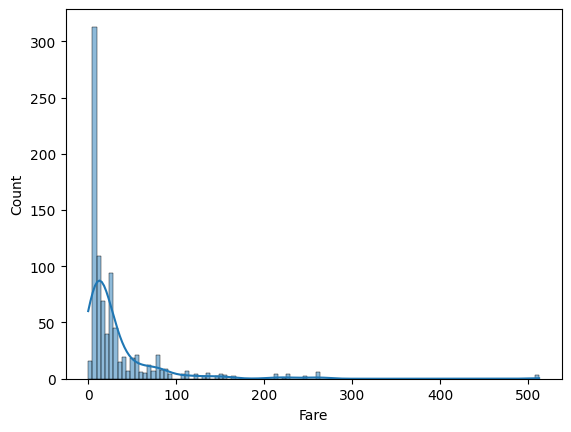

In [26]:
sns.histplot(df['Fare'], kde= True)

In [27]:
df.drop(df[['Cabin', 'PassengerId', 'Ticket']], axis= 1, inplace= True)

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

df['Age'] = imputer.fit_transform(df[['Age']])

In [29]:
df.drop_duplicates()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


<Axes: xlabel='Pclass', ylabel='Age'>

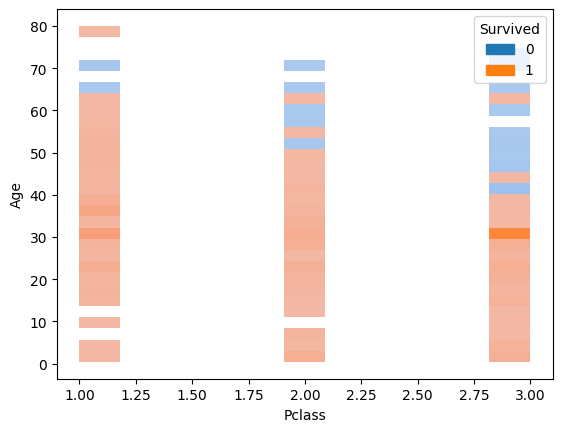

In [30]:
sns.histplot(x= 'Pclass', y= 'Age', data= df, hue= 'Survived')

<Axes: >

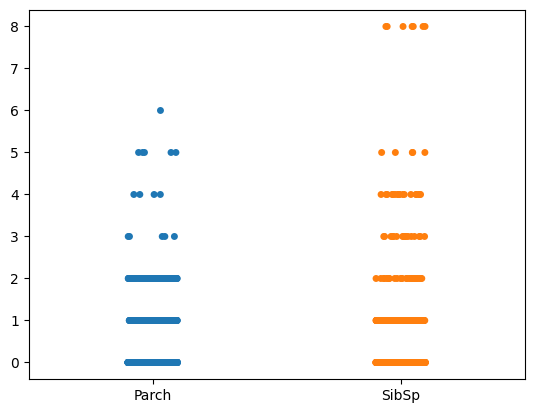

In [31]:
sns.stripplot(df[['Parch', 'SibSp']])

<Axes: xlabel='Pclass', ylabel='Age'>

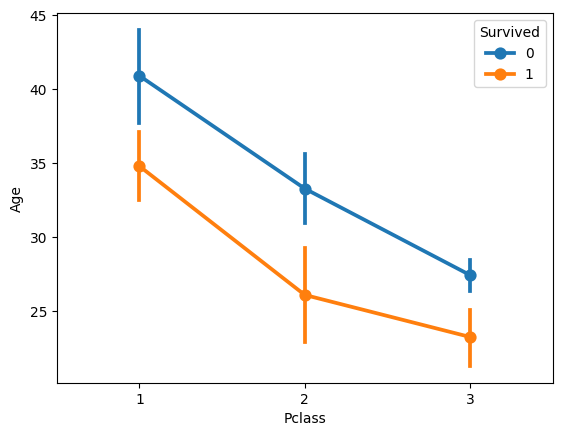

In [32]:
sns.pointplot(data= df, x= 'Pclass', y= 'Age', hue= 'Survived')

In [33]:
from sklearn.preprocessing import MinMaxScaler

minmx = MinMaxScaler()
df['Fare'] = minmx.fit_transform(df[['Fare']])

In [34]:
df['Fare']

0      0.014151
1      0.139136
2      0.015469
3      0.103644
4      0.015713
         ...   
886    0.025374
887    0.058556
888    0.045771
889    0.058556
890    0.015127
Name: Fare, Length: 891, dtype: float64

<Axes: >

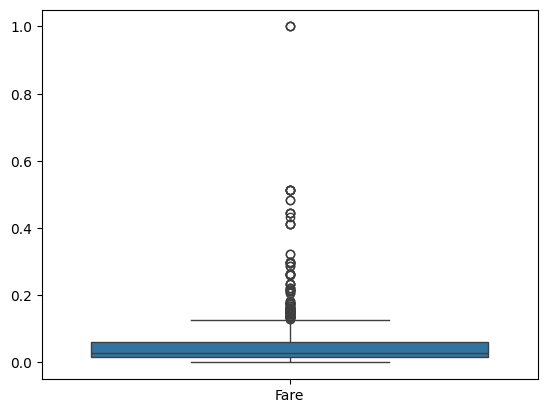

In [35]:
sns.boxplot(df[['Fare']])

<Axes: ylabel='Fare'>

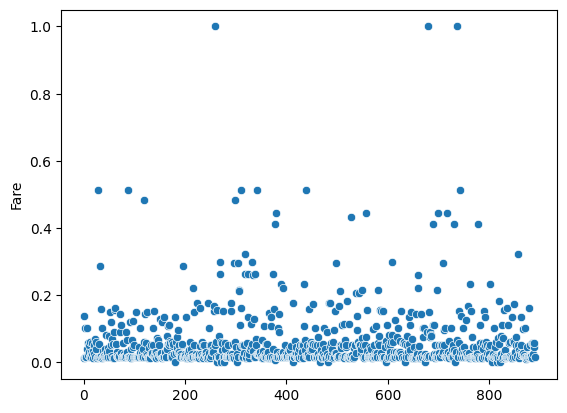

In [36]:
sns.scatterplot(df['Fare'])